In [111]:
import pandas as pd
train_file = '/home/kenbaker-gif/ML-Projects/data/train.csv'
test_file = '/home/kenbaker-gif/ML-Projects/data/test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [112]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB
None


In [113]:
print(train_data.isnull().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [114]:
print(train_data.describe())

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

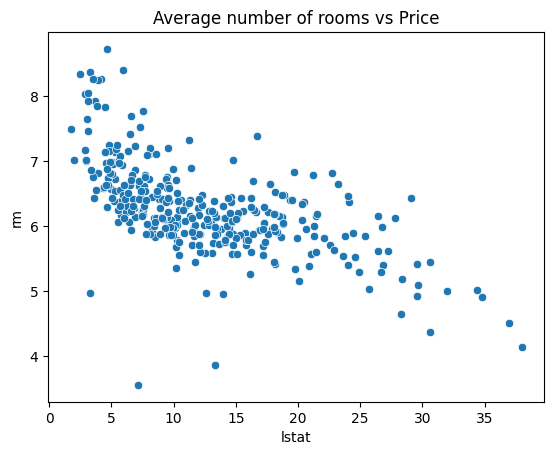

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='lstat', y='rm', data=train_data)
plt.title('Average number of rooms vs Price')
plt.show()

In [118]:
X = train_data[['rm', 'lstat', 'crim']].values
y = train_data['medv'].values

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'penalty': ['l2', 'l1', 'elasticnet']
}

grid = GridSearchCV(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best R²:", grid.best_score_)

Best parameters: {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'invscaling', 'penalty': 'l1'}
Best R²: 0.6015093716717872


In [122]:
from sklearn.linear_model import SGDRegressor

lr_model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.01,
    learning_rate='invscaling',
    eta0=0.001,         # Try 0.001 or 0.0001 if it's still diverging
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)


In [123]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2-score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2-score: 0.6861759772077816
MSE: 28.243654507881192


In [124]:
import joblib
joblib.dump(lr_model, 'sgd_regressor_lr_model.pkl')

['sgd_regressor_lr_model.pkl']

In [125]:
from sklearn.linear_model import LinearRegression

baseline = LinearRegression()
baseline.fit(X_train_scaled, y_train)
y_base_pred = baseline.predict(X_test_scaled)

print("Baseline R2:", r2_score(y_test, y_base_pred))
print("Baseline MSE:", mean_squared_error(y_test, y_base_pred))

Baseline R2: 0.681400241911525
Baseline MSE: 28.673462960811094


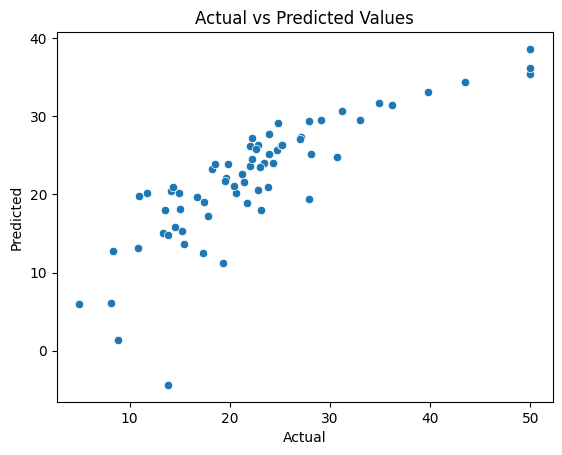

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()